# Importing all required Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as ss
from scipy.stats import chi2, chi2_contingency
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import os
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Function that execute the qui-square test
def test_dependency(alpha, cont):
    conf = 1-alpha
    X2, p, dof, expected = chi2_contingency(cont)
    critical = chi2.ppf(conf, dof)
    if abs(X2) >= critical:
        print('dependent (reject H0)')
    else:
        print('independent (fail to reject H0)')


def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

# Uncertainty coefficient or Thiel's U
def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [3]:
df = pd.read_csv("./data/online_shoppers_intention.csv")

# Data Cleaning

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
df.head(4)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False


# Data Visualisation

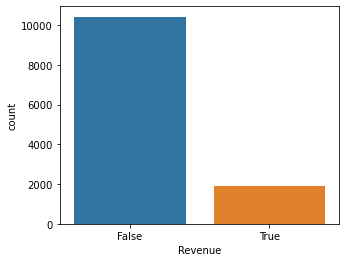

In [8]:
fig, axs = plt.subplots(figsize=(5,4))
g = sns.countplot(x='Revenue', data=df, ax=axs)

<AxesSubplot:>

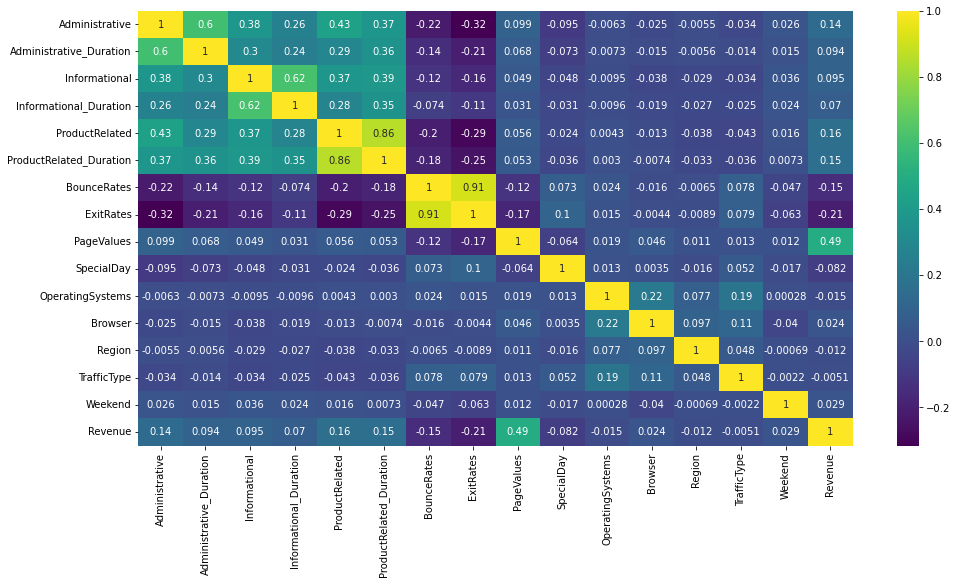

In [9]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

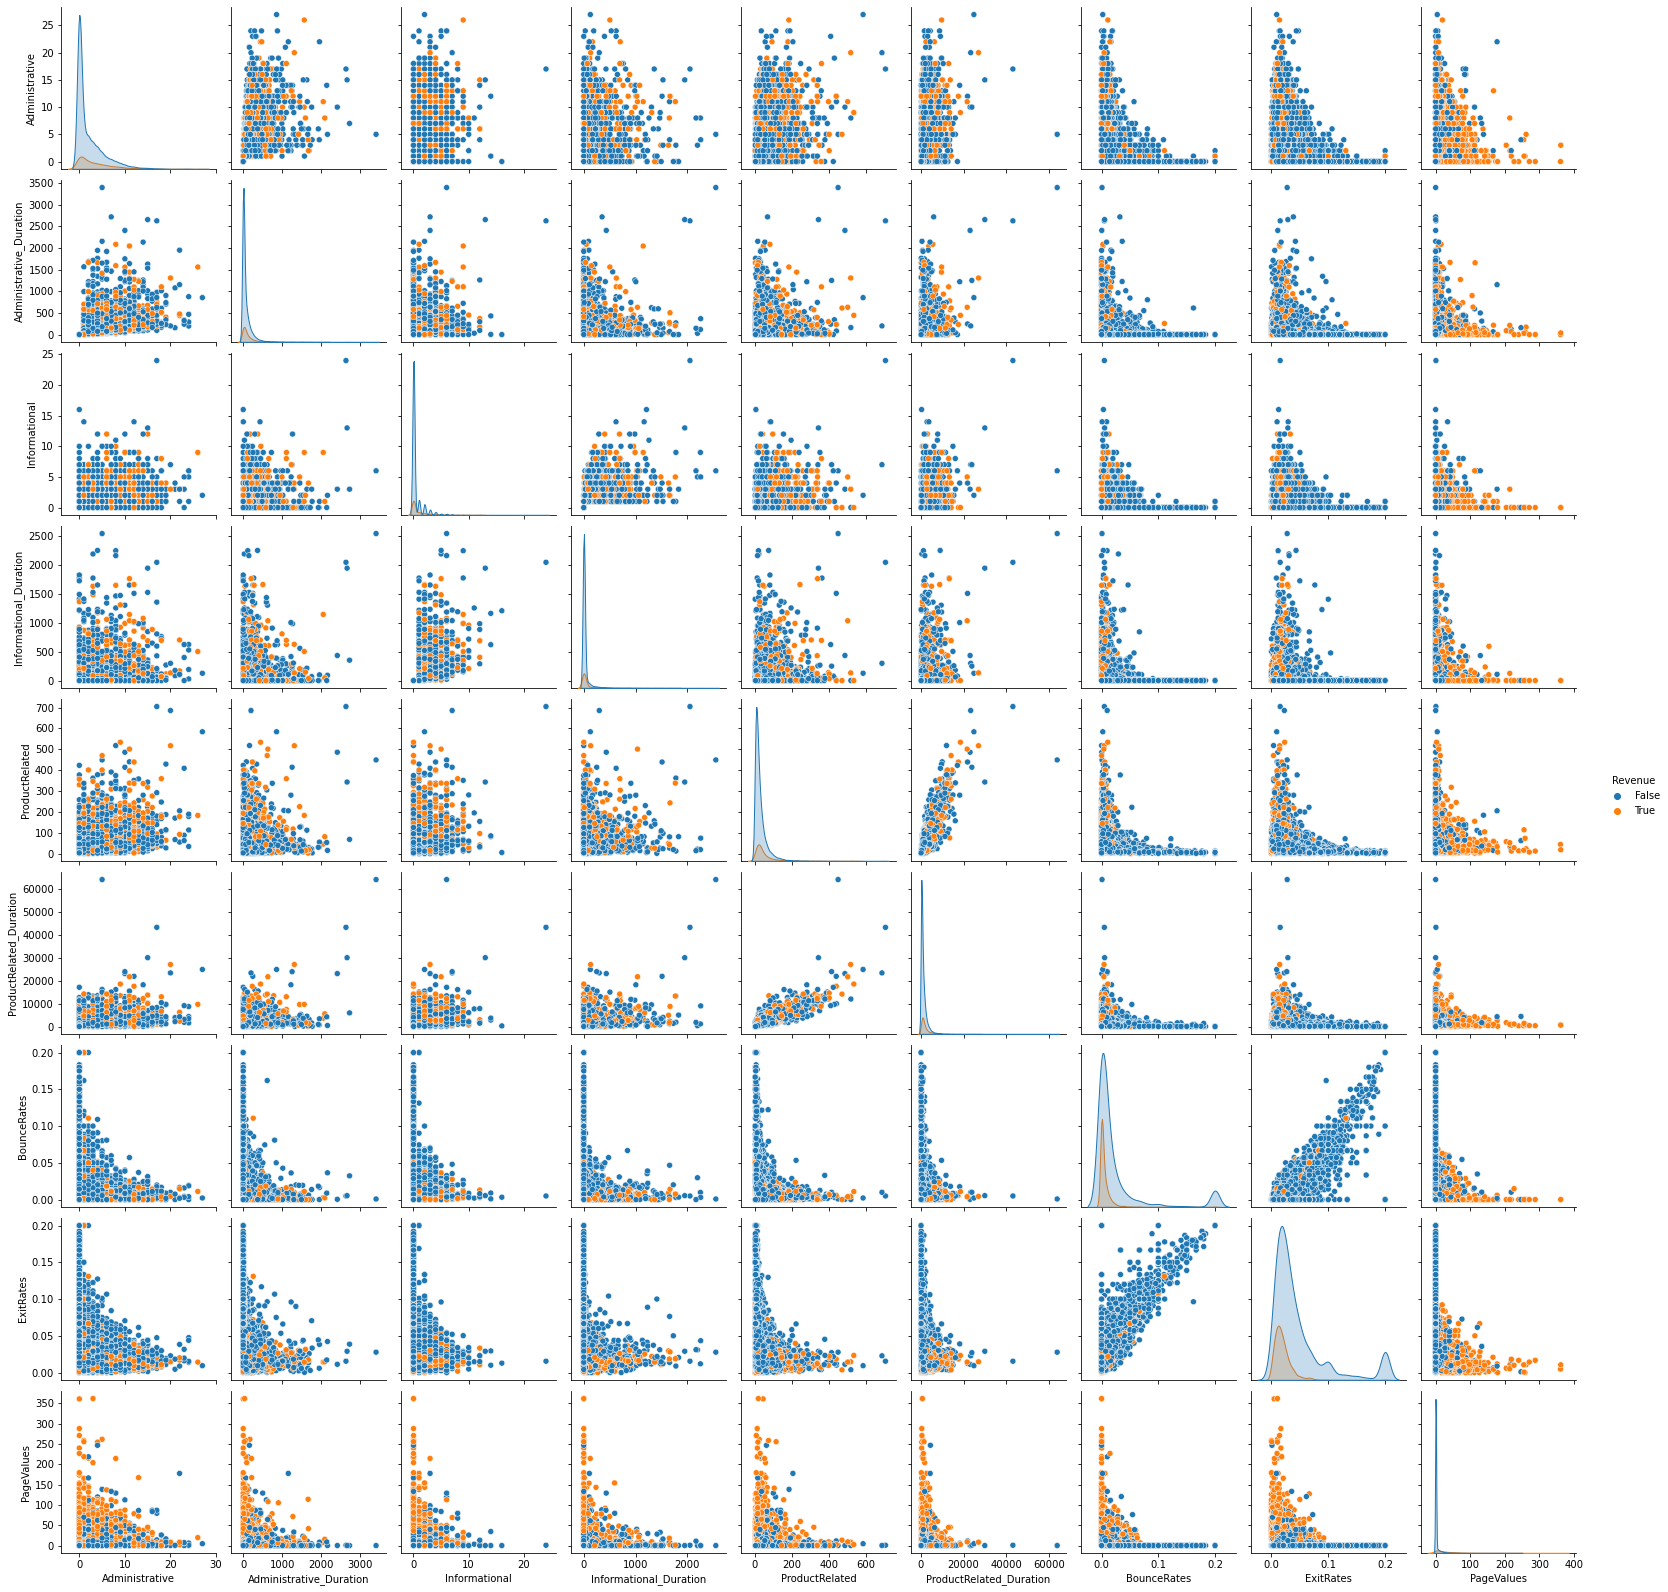

In [10]:
sns.pairplot(df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues','Revenue']],hue='Revenue')

<AxesSubplot:xlabel='ExitRates', ylabel='BounceRates'>

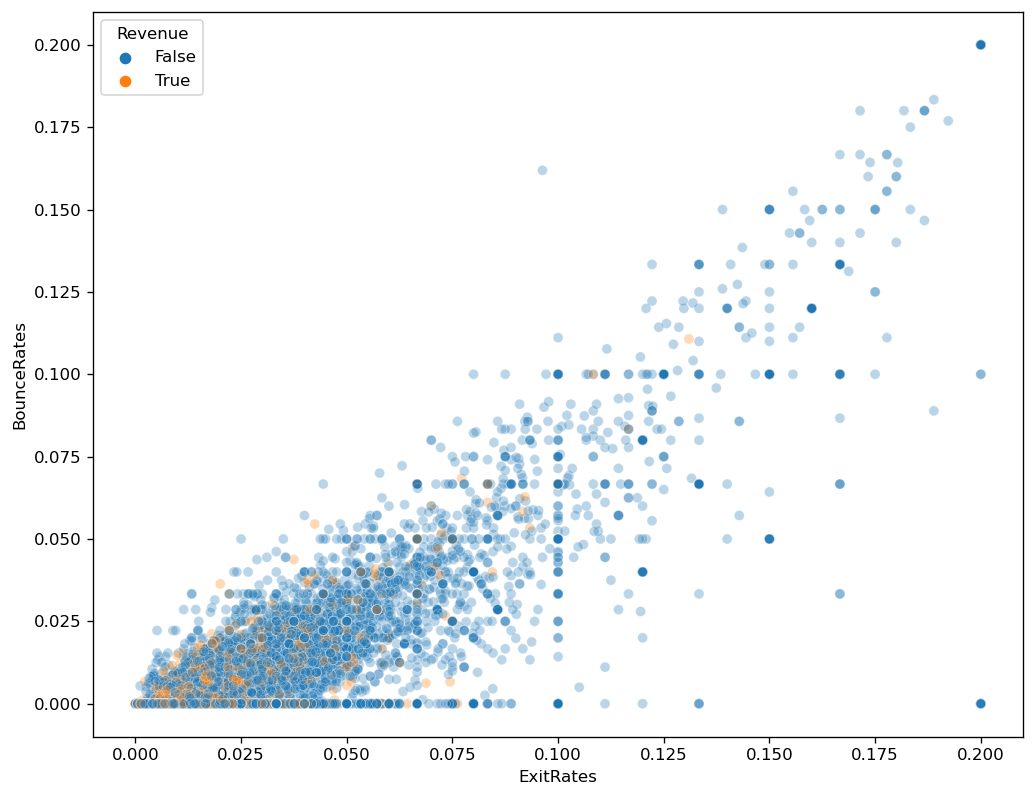

In [11]:
plt.figure(figsize=(10,8),dpi=120)
sns.scatterplot(data=df,x='ExitRates',y='BounceRates',hue='Revenue',alpha=0.3)

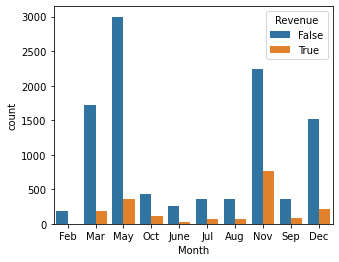

In [12]:
fig, axs = plt.subplots(figsize=(5,4))
g = sns.countplot(x='Month', data=df, ax=axs, hue='Revenue')

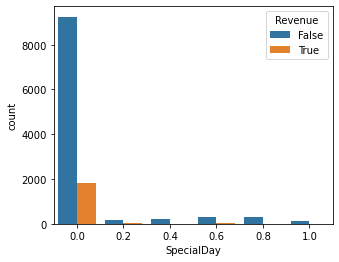

In [13]:
fig, axs = plt.subplots(figsize=(5,4))
g = sns.countplot(x='SpecialDay', data=df, ax=axs, hue='Revenue')

In [14]:
df[['SpecialDay','Month','Revenue']].groupby('Month').sum()

,SpecialDay,Revenue
Month,,
Aug,0.0,76
Dec,0.0,216
Feb,43.0,3
Jul,0.0,66
June,0.0,29
Mar,0.0,192
May,714.4,365
Nov,0.0,760
Oct,0.0,115


In [15]:
pd.crosstab(df['Weekend'],df['Revenue'], margins=True)

Revenue,False,True,All
Weekend,,,
False,8053,1409,9462
True,2369,499,2868
All,10422,1908,12330


In [16]:
df[['BounceRates','Revenue']].groupby('Revenue').mean()

,BounceRates
Revenue,
False,0.025317
True,0.005117


In [17]:
df[['ExitRates','Revenue']].groupby('Revenue').mean()

,ExitRates
Revenue,
False,0.047378
True,0.019555


In [18]:
df[['PageValues','Revenue']].groupby('Revenue').mean()

,PageValues
Revenue,
False,1.975998
True,27.264518


# Model Generation

In [19]:
from sklearn.model_selection import train_test_split
# Divide X and y
y = df['Revenue']
X = df.drop(['Revenue'], axis=1)

# Split dataset
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [20]:
y_train = y_train.map({True:1, False:0})
y_valid = y_valid.map({True:1, False:0})

In [21]:
import fuzzywuzzy
from fuzzywuzzy import process

class CustomPreProcessing():

    def __init__(self, min_ratio = 80, verbose = False):
        if(verbose):
            print("__init__")
        self.__class__.__name__ = 'CustomPreProcessing'
        self.min_ratio = min_ratio
        self.data = pd.DataFrame({'No data' : []})
        self.verbose = verbose

    
    def replace_matches_in_column(self, column, string_to_match, verbose=False):
        # get a list of unique strings
        strings = self.data[column].unique()
        
        # get the top 10 closest matches to our input string
        matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                            limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

        # only get matches with a ratio > 90
        close_matches = [matches[0] for matches in matches if matches[1] >= self.min_ratio]
        if (verbose):
            print(f'Searching for:{string_to_match}, close match: {close_matches}')
        # get the rows of all the close matches in our dataframe
        rows_with_matches = self.data[column].isin(close_matches)

        # replace all rows with close matches with the input matches 
        self.data.loc[rows_with_matches, column] = string_to_match

    def rem_inconsistent_date(self, X, values):
        if(self.verbose):
            print("rem_inconsistentdata")

        for val in values:
            self.replace_matches_in_column('Month', val)
    
    def map_months(self, months):
        if(self.verbose):    
            print('map_months')
        self.data['Month'] = self.data['Month'].map(dict((v,k+1) for k,v in enumerate(months)))
    
    def map_visitors(self, visitor_type):
        if(self.verbose):
            print('map_visitor_type')
        self.data['VisitorType'] = self.data['VisitorType'].map(dict((v,k) for k,v in enumerate(visitor_type)))
    
    def map_weekend(self):
        if(self.verbose):
            print('map_weekeend')     
        self.data['Weekend'] = self.data['Weekend'].map({True:1, False:0})
       

    def fit(self, X, y = None):
        if(self.verbose):
            print('fit')
        return self
    
    def transform(self, X, y = None):
        if(self.verbose):
            print("transform")

        self.data = X.copy()

        months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Oct','Sep','Nov','Dec']
        visitor_type = ['Returning_Visitor', 'New_Visitor','Other']

        try:
            
            # remove inconsistentdata
            self.rem_inconsistent_date(self.data, months)

            # mapping months from str to numeric
            self.map_months(months)

            # mapping visitortype from str to numeric
            self.map_visitors(visitor_type)

            # mapping Weekend from boolean to numeric
            self.map_weekend()

        except KeyError as ke:
            print(ke)
            pass
        finally:
            return self.data



    def __repr__(self):
        return 'CustomPreProcessing'

    def getdata(self):
        return self.data

# XGBClassifier 

In [22]:
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

scoring = ('roc_auc','accuracy','precision','recall')

baseline = Pipeline([
                ('Preprocessor',CustomPreProcessing(min_ratio=80, verbose=False)),
                ('model',XGBClassifier(eval_metric='logloss'))])
scores = cross_validate(baseline, X_train_full, y_train, cv=5, scoring=scoring)

In [23]:
for k, v in scores.items():
    print(k, np.round(v.mean(),4)) 

fit_time 0.5524
score_time 0.0261
test_roc_auc 0.9262
test_accuracy 0.9005
test_precision 0.7075
test_recall 0.5801
